In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.io as pio

In [2]:
# Load your dataset
df = pd.read_csv("best_buy_products_filtered.csv")

In [63]:
len(df.columns)

40

In [3]:
# Cleaning prices (remove $ and convert to numeric)
df['final_price'] = df['final_price'].replace('[\$,]', '', regex=True).astype(float)
df['initial_price'] = df['initial_price'].replace('[\$,]', '', regex=True).astype(float)

In [4]:
# Filling missing 'release_date' with median date
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
median_date = df['release_date'].median()
df['release_date'].fillna(median_date, inplace=True)

C:\Users\Hemu\AppData\Local\Temp\ipykernel_19728\488913764.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['release_date'].fillna(median_date, inplace=True)


In [5]:
# Fill numeric missing values with median
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

In [6]:
# Fill categorical missing values with mode
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

C:\Users\Hemu\AppData\Local\Temp\ipykernel_19728\2399547233.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype              
---  ------                       --------------  -----              
 0   url                          1000 non-null   object             
 1   product_id                   1000 non-null   int64              
 2   title                        1000 non-null   object             
 3   images                       1000 non-null   object             
 4   final_price                  1000 non-null   float64            
 5   currency                     1000 non-null   object             
 6   discount                     1000 non-null   object             
 7   initial_price                1000 non-null   float64            
 8   offer_price                  1000 non-null   object             
 9   root_category                1000 non-null   object             
 10  breadcrumbs                  1000 non-null   obje

In [8]:
df['year'] = df['release_date'].dt.year

In [9]:
# Suppose you want 10 bins for final_price:-IMPROVEMENT IN THE X AXIS
bins = [0, 50, 100, 200, 300, 400, 500, 1000, 2000, 5000,10000, df['final_price'].max()+1]

# Create a binned column for final_price
df['price_bin'] = pd.cut(df['final_price'], bins=bins, include_lowest=True, right=False)

# Count how many products fall into each price bin
price_bin_counts = df['price_bin'].value_counts().sort_index()

# Build the bar chart in Plotly
fig = px.bar(
    x=price_bin_counts.index.astype(str),  # Convert bins to string for x-axis
    y=price_bin_counts.values,
    title='Number of Products by Final Price Range',
    
    labels={'x': 'Final Price Range', 'y': 'Number of Products'},
    height=700
)

# Rotate the x-axis labels and set y-axis limit to 450
fig.update_layout(
    xaxis=dict(tick0=3, dtick=0.15, tickangle=0),
    yaxis=dict(range=[0, 450]),
)

fig.show()


In [10]:
# 2. Rating Distribution
fig = px.histogram(df, x='rating', nbins=20,
                   title='Univariate Analysis: Rating Distribution',
                   labels={'rating': 'Customer Ratings'},color='root_category',height=600)

fig.update_yaxes(range=[0, 500], dtick=25)
fig.update_xaxes(dtick=0.5)
fig.show()


In [11]:
## 2.4 Discount Percentage Distribution  #HAS TO FIX IT
#it contains columns like save 50,....
fig = px.histogram(df, x='discount', nbins=30, 
                   title='Distribution of Discount Percentages',color='root_category')
fig.update_layout(xaxis_title='Discount Percentage', yaxis_title='Frequency')
fig.show()


In [12]:
# Calculate discount percentage
df['discount_percentage'] = ((df['initial_price'] - df['final_price']) / df['initial_price']) * 100


In [13]:
#2. CATEGORY DISTRIBUTION")
print("-----------------")
category_dist = df['root_category'].value_counts()
print("\
Top 10 Product Categories:")
print(category_dist.head(10))

# Create visualization for category distribution using Plotly
fig = px.bar(
    x=category_dist.head(10).index,
    y=category_dist.head(10).values,
    title='Top 10 Product Categories',
    labels={'x': 'Category', 'y': 'Count'},
    text=category_dist.head(10).values
)

fig.update_layout(xaxis_title='Category', yaxis_title='Count')

fig.show()

-----------------
Top 10 Product Categories:
root_category
Appliances                  246
Car Electronics & GPS       195
Video Games                 115
Computers & Tablets         112
Smart Home                   55
Cell Phones                  42
TV & Home Theater            35
Gift Cards                   34
Home, Furniture & Office     33
Audio                        31
Name: count, dtype: int64


In [14]:
# Data preprocessing for the discount column
df['discount_range'] = df['discount'].replace(r'\D', '', regex=True).astype(float)


In [15]:
df['discount_range'] 

0      50.0
1      50.0
2      50.0
3      12.0
4      40.0
       ... 
995    50.0
996    50.0
997    50.0
998    50.0
999    16.0
Name: discount_range, Length: 1000, dtype: float64

In [16]:
## veryyy minor change
fig = px.histogram(df, x='discount_percentage',
                   title='Distribution of Discount Ranges',
                   labels={'discount_range': 'Discount Range (%)'},range_x=[0, 100,],color='root_category')
fig.show()


In [17]:
df.columns

Index(['url', 'product_id', 'title', 'images', 'final_price', 'currency',
       'discount', 'initial_price', 'offer_price', 'root_category',
       'breadcrumbs', 'release_date', 'esrb_rating', 'rating', 'reviews_count',
       'questions_count', 'hot_offer', 'open_box', 'availability',
       'you_maight_also_need', 'variations', 'highlights',
       'product_description', 'features_summary', 'features', 'whats_included',
       'q_a', 'product_specifications', 'amount_of_stars', 'customer_images',
       'customers_ultimately_bought', 'deals_on_realated_items',
       'frequently_bought_with', 'recommend_percentage', 'year', 'price_bin',
       'discount_percentage', 'discount_range'],
      dtype='object')

In [18]:
df['recommend_percentage'] 

0       89.0
1       89.0
2       43.0
3       80.0
4       97.0
       ...  
995     98.0
996     50.0
997    100.0
998     97.0
999     62.0
Name: recommend_percentage, Length: 1000, dtype: float64

In [19]:
df['availability']

0      [{"availability_name":"Pickup"},{"availability...
1      [{"availability_name":"Pickup","availability_v...
2      [{"availability_name":"Pickup","availability_v...
3      [{"availability_name":"Pickup","availability_v...
4      [{"availability_name":"Pickup","availability_v...
                             ...                        
995    [{"availability_name":"Pickup","availability_v...
996    [{"availability_name":"Pickup","availability_v...
997    [{"availability_name":"Pickup","availability_v...
998    [{"availability_name":"Pickup","availability_v...
999    [{"availability_name":"Pickup","availability_v...
Name: availability, Length: 1000, dtype: object

In [20]:
#availability column
df['availability'][1]

'[{"availability_name":"Pickup","availability_value":"2024-05-02T00:00:00.000Z"},{"availability_name":"Shipping","availability_value":"2024-04-30T00:00:00.000Z"}]'

In [21]:
# Function to safely parse JSON-like strings and extract availability types
import json
def extract_availability_types(availability_json):
    availability_types = []
    if pd.isna(availability_json):
        return availability_types
    try:
        # Convert single quotes to double quotes and parse the string as JSON
        availability_list = json.loads(availability_json.replace("'", '"'))
        for item in availability_list:
            if 'availability_name' in item:
                availability_types.append(item['availability_name'])
    except Exception as e:
        print(f"Error parsing JSON: {e} - JSON: {availability_json}")
    return availability_types

# Apply the function to the availability column
df['availability_types'] = df['availability'].apply(extract_availability_types)

# Explode the list into separate rows
df_exploded = df.explode('availability_types')

In [22]:
# Checking if the extraction went well
print(df_exploded['availability_types'].value_counts())

# Count the occurrence of each availability type
availability_counts = df_exploded['availability_types'].value_counts().reset_index()
availability_counts.columns = ['Availability', 'Count']

# Creating the bar plot with Plotly
import plotly.express as px

if not availability_counts.empty:
    fig = px.bar(availability_counts, x='Availability', y='Count', title='Product Availability Types')
    fig.show()
else:
    print("No data available to plot.")

availability_types
Pickup                     978
Shipping                   858
Delivery                    73
Delivery + Installation     64
Name: count, dtype: int64


In [23]:
df['esrb_rating']

0      M (Mature 17+)
1      M (Mature 17+)
2        E (Everyone)
3      M (Mature 17+)
4      M (Mature 17+)
            ...      
995    M (Mature 17+)
996    M (Mature 17+)
997    M (Mature 17+)
998    M (Mature 17+)
999    M (Mature 17+)
Name: esrb_rating, Length: 1000, dtype: object

In [24]:
# Visualization of ESRB Rating Distribution
fig = px.histogram(df, x='esrb_rating', title='ESRB Rating Distribution',color='root_category')
fig.show()

In [25]:
# Product Recommendation Percentage Distribution
fig = px.histogram(df, x='recommend_percentage', color='root_category',title='Distribution of Recommendation Percentages')
fig.show()

### 2.Bi-variate Analysis

In [26]:
#Final price vs rating
filtered_data = df[df['final_price'] <= 1000]
fig = px.scatter(filtered_data, x='final_price', y='rating',
                 title='Final Price vs Rating (Products with price ≤ $1000)',
                 color='root_category',
                 labels={'final_price': 'Final Price ($)', 'rating': 'Rating'})
fig.show()


In [27]:
#Reviews Count vs Rating

# Filtering extreme outliers for clarity
df_filtered = df[df['reviews_count'] <= df['reviews_count'].quantile(0.98)]

fig = px.scatter(df_filtered, 
                 x='rating', 
                 y='reviews_count',
                 title='Bivariate Analysis: Rating vs Reviews Count (Filtered)',
                 labels={'rating':'Average Rating', 'reviews_count':'Number of Reviews'},
                 hover_data=['title'], 
                 color='root_category',
                 width=1000,  
                 height=700   
                )

# Optimized axes limits for clarity
fig.update_xaxes(range=[0, 5], dtick=0.25)
fig.update_yaxes(range=[0, df_filtered['reviews_count'].max()+500], dtick=500)


fig.show()




In [28]:
#Price Distribution by Root Category
fig = px.box(df, x='root_category', y='final_price',
             title='Price Distribution by Root Category',
             labels={'root_category': 'Root Category', 'final_price': 'Final Price ($)'},
             notched=True)  # shows the confidence interval around the median
fig.update_traces(quartilemethod="inclusive")  # Include all points between Q1 and Q3 within the whiskers
fig.show()

In [29]:
df['year'].max()


2024

In [30]:
fig = px.scatter(df, x='reviews_count', y='questions_count', trendline='ols',
                 title='Reviews Count vs. Questions Count')
fig.update_layout(xaxis_title='Reviews Count', yaxis_title='Questions Count')
fig.show()


In [31]:
df['reviews_count']

0         27.0
1        941.0
2          7.0
3         40.0
4         33.0
        ...   
995    32464.0
996        2.0
997        1.0
998     1349.0
999       13.0
Name: reviews_count, Length: 1000, dtype: float64

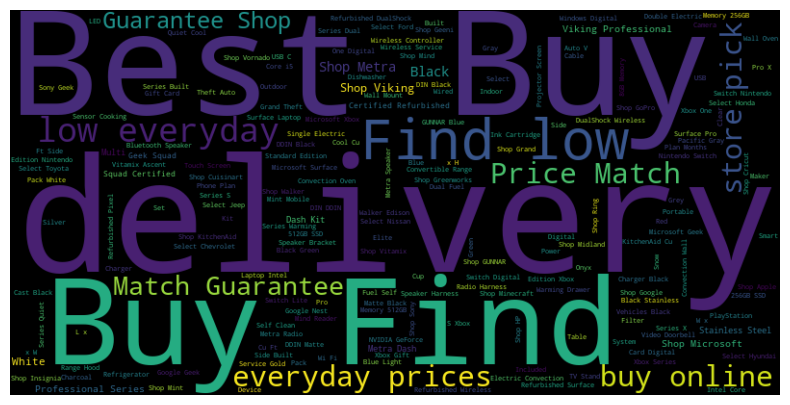

In [32]:
#!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = ' '.join(df['product_description'].dropna())
wordcloud = WordCloud(width=800, height=400).generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [71]:
import plotly.graph_objects as go
numeric_cols = ['final_price', 'initial_price', 'rating', 'reviews_count', 'questions_count', 'recommend_percentage']
corr_matrix = df[numeric_cols].corr()

fig = go.Figure(data=go.Heatmap(
    z=corr_matrix,
    x=corr_matrix.columns,
    y=corr_matrix.columns,
    colorscale='Blues'
))
fig.update_layout(title='Correlation Matrix of Numeric Variables')
fig.update_layout(autosize=False, width=1100, height=800)

fig.show()



In [34]:
df['year'] = pd.to_datetime(df['release_date']).dt.year
fig = px.histogram(df, x='year',
                   title='Product Releases Over the Years',
                   labels={'year': 'Year'},color='root_category')
fig.update_layout(xaxis_title='Year', yaxis_title='Number of Products Released')
fig.show()


In [35]:
fig = px.scatter_matrix(df,
                        dimensions=['reviews_count', 'questions_count', 'rating', 'final_price'],
                        color='root_category',
                        title='Impact of Reviews, Questions, and Ratings on Price')
fig.update_layout(autosize=False, width=1200, height=800)
fig.show()


In [36]:
df['discount_percentage']

0       0.000000
1       0.000000
2       0.000000
3      30.007502
4      19.048526
         ...    
995     0.000000
996     0.000000
997     0.000000
998     0.000000
999    14.160545
Name: discount_percentage, Length: 1000, dtype: float64

In [37]:
# Assuming 'release_date' is converted to datetime
df['month'] = pd.to_datetime(df['release_date']).dt.month

fig = px.line(df.groupby('month').size(), title='Seasonal Trends in Product Releases',
              labels={'value': 'Number of Products', 'month': 'Month'})
fig.show()


In [38]:
# Yearly Average Rating Trends
yearly_average_rating = df.groupby('year')['rating'].mean()
fig = px.line(yearly_average_rating, title='Yearly Average Rating Trends', labels={'year': 'Year', 'rating': 'Average Rating'})
fig.show()


In [39]:
import statsmodels.api as sm

df.set_index('release_date', inplace=True)  # Setting release_date as index

# Monthly product counts
monthly_data = df.resample('M').size()

# Fit an ARIMA model
model = sm.tsa.statespace.SARIMAX(monthly_data,
                                  order=(1, 1, 1),  # Example parameters (p, d, q)
                                  seasonal_order=(1, 1, 1, 12))  # Seasonal parameters (P, D, Q, S)
results = model.fit()

# Forecast the next 12 months
forecast = results.get_forecast(steps=12)
print(forecast.summary_frame())

C:\Users\Hemu\AppData\Local\Temp\ipykernel_19728\2048217164.py:6: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



y                               mean    mean_se  mean_ci_lower  mean_ci_upper
2024-05-31 00:00:00+00:00   2.532915  78.602136    -151.524441     156.590271
2024-06-30 00:00:00+00:00   2.626650  78.620565    -151.466826     156.720126
2024-07-31 00:00:00+00:00   3.454143  78.496298    -150.395775     157.304061
2024-08-31 00:00:00+00:00   3.371616  78.516837    -150.518558     157.261789
2024-09-30 00:00:00+00:00   4.624664  78.537322    -149.305659     158.554987
2024-10-31 00:00:00+00:00   4.215108  78.557801    -149.755353     158.185569
2024-11-30 00:00:00+00:00   4.041849  78.578275    -149.968741     158.052438
2024-12-31 00:00:00+00:00  77.897907  78.598744     -76.152799     231.948614
2025-01-31 00:00:00+00:00   3.066988  78.619207    -151.023825     157.157802
2025-02-28 00:00:00+00:00   3.514603  78.639664    -150.616307     157.645513
2025-03-31 00:00:00+00:00   3.949186  78.660117    -150.221811     158.120183
2025-04-30 00:00:00+00:00   3.442872  78.680653    -150.768374  

In [74]:
import plotly.graph_objects as go
import plotly.io as pio

# Assuming 'forecast' is your ARIMA model forecast output
forecast_df = forecast.summary_frame()

fig = go.Figure()

# Plotting the mean forecast
fig.add_trace(go.Scatter(
    x=forecast_df.index, 
    y=forecast_df['mean'],
    mode='lines',
    name='Forecasted Mean'
))

# Adding upper and lower confidence intervals
fig.add_trace(go.Scatter(
    x=forecast_df.index.tolist() + forecast_df.index[::-1].tolist(),
    y=forecast_df['mean_ci_upper'].tolist() + forecast_df['mean_ci_lower'][::-1].tolist(),
    fill='toself',
    fillcolor='rgba(0,100,80,0.2)',
    line=dict(color='rgba(255,255,255,0)'),
    name='Confidence Interval'
))

fig.update_layout(
    title='ARIMA Forecast with Confidence Intervals',
    xaxis_title='Date',
    yaxis_title='Forecasted Value',
    showlegend=True
)

fig.show()
pio.write_html(fig, file='gg.html', auto_open=True)

In [41]:
df['discount_percentage'].fillna(df['discount_percentage'].median(), inplace=True)

C:\Users\Hemu\AppData\Local\Temp\ipykernel_19728\3686456578.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [42]:
from statsmodels.regression.linear_model import OLS
from statsmodels.tools import add_constant
# Predictive Analytics: Predicting Recommendation Percentage
X = df[['final_price', 'rating', 'reviews_count', 'questions_count','discount_percentage']]
y = df['recommend_percentage']
X = add_constant(X)  # adding a constant

# Fit model
model = OLS(y, X).fit()
print(model.summary())

# Visualize the relationship
fig = px.scatter(df, x='rating', y='recommend_percentage', trendline='ols', title='Rating vs. Recommendation Percentage')
fig.show()

                             OLS Regression Results                             
Dep. Variable:     recommend_percentage   R-squared:                       0.580
Model:                              OLS   Adj. R-squared:                  0.578
Method:                   Least Squares   F-statistic:                     274.3
Date:                  Tue, 15 Apr 2025   Prob (F-statistic):          2.76e-184
Time:                          13:29:54   Log-Likelihood:                -3576.5
No. Observations:                  1000   AIC:                             7165.
Df Residuals:                       994   BIC:                             7194.
Df Model:                             5                                         
Covariance Type:              nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const         

In [43]:
#Address Multicollinearity check ,if they are greater than 10,then issue
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to calculate VIF for each feature
def calculate_vif(df, features):
    X = df[features]
    X['Intercept'] = 1
    
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    
    return vif_data.drop(index=vif_data[vif_data['feature'] == 'Intercept'].index)

# Calculate VIF for your model's features
features = ['final_price', 'rating', 'reviews_count', 'questions_count', 'discount_percentage']
vif_data = calculate_vif(df, features)
print(vif_data)


               feature       VIF
0          final_price  1.039173
1               rating  1.029226
2        reviews_count  1.394782
3      questions_count  1.379601
4  discount_percentage  1.033240


C:\Users\Hemu\AppData\Local\Temp\ipykernel_19728\1510544818.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error

X = df[['final_price', 'rating', 'reviews_count', 'questions_count', 'discount_percentage']]
y = df['recommend_percentage']
X = sm.add_constant(X)  # adding a constant for OLS

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [45]:
# OLS Regression
ols_model = LinearRegression()
ols_model.fit(X_train, y_train)
y_pred_ols = ols_model.predict(X_test)
r2_ols = r2_score(y_test, y_pred_ols)
print(f"OLS R-squared: {r2_ols}")



OLS R-squared: 0.7664876256808921


In [46]:
# Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f"Ridge R-squared: {r2_ridge}")



Ridge R-squared: 0.7650593850651505


In [47]:
# Lasso Regression
lasso_model = Lasso(alpha=0.01)  # Alpha is a hyperparameter and should be chosen wisely
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
r2_lasso = r2_score(y_test, y_pred_lasso)
print(f"Lasso R-squared: {r2_lasso}")



Lasso R-squared: 0.7658200836412005


In [48]:
# Comparing the models
print("Comparison of Models:")
print(f"OLS Model R-squared: {r2_ols}")
print(f"Ridge Model R-squared: {r2_ridge}")
print(f"Lasso Model R-squared: {r2_lasso}")



Comparison of Models:
OLS Model R-squared: 0.7664876256808921
Ridge Model R-squared: 0.7650593850651505
Lasso Model R-squared: 0.7658200836412005


In [49]:
# You may also want to check other metrics like Mean Squared Error
mse_ols = mean_squared_error(y_test, y_pred_ols)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print(f"OLS MSE: {mse_ols}")
print(f"Ridge MSE: {mse_ridge}")
print(f"Lasso MSE: {mse_lasso}")

OLS MSE: 42.53492697906424
Ridge MSE: 42.795084970589286
Lasso MSE: 42.65652161402324


In [50]:
#let's use llm
from transformers import pipeline
# Using 'facebook/bart-large-mnli' for natural language inference tasks
# Initialize the zero-shot classification pipeline with a model suitable for sentiment analysis
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

# Define sentiment labels
sentiment_labels = ['Positive', 'Neutral', 'Negative']

Device set to use cpu


In [51]:
# Function to classify sentiment of descriptions
def classify_sentiment(text):
    if pd.isna(text):
        return "No Description"  # Handle missing descriptions
    result = classifier(text, candidate_labels=sentiment_labels, multi_label=False)
    return result['labels'][0]  # Return the highest scoring sentiment

# Apply the classification to each product description
df['sentiment'] = df['product_description'].apply(classify_sentiment)

# Optionally, calculate the proportion of each sentiment
sentiment_distribution = df['sentiment'].value_counts(normalize=True)
print("Sentiment Distribution in Product Descriptions:")
print(sentiment_distribution)



Sentiment Distribution in Product Descriptions:
sentiment
Positive    0.988
Negative    0.008
Neutral     0.004
Name: proportion, dtype: float64


In [52]:
# Display some results
print(df[['product_description', 'sentiment']].head())

                                                         product_description  \
release_date                                                                   
2019-12-07 00:00:00+00:00  Shop Instant Pot Precision 5-in-1 Electric Dut...   
2019-12-07 00:00:00+00:00  Shop Instant Pot Vortex Plus 10 Quart Air Frye...   
2020-08-06 00:00:00+00:00  Shop Instant Sports Summer Games Nintendo Swit...   
2021-09-29 00:00:00+00:00  Shop Insurgency Sandstorm Xbox One, Xbox Serie...   
2019-12-07 00:00:00+00:00  Shop Intel Core i5-12400 12th Generation 6 Cor...   

                          sentiment  
release_date                         
2019-12-07 00:00:00+00:00  Positive  
2019-12-07 00:00:00+00:00  Positive  
2020-08-06 00:00:00+00:00  Positive  
2021-09-29 00:00:00+00:00  Positive  
2019-12-07 00:00:00+00:00  Positive  


In [53]:
df.to_csv('fonal_best_buy_data.csv', index=False)


In [54]:
# Create a Treemap to visualize sentiment distribution across root categories
fig = px.treemap(df, path=['root_category', 'sentiment'], values='product_id',
                 title='Treemap of Product Sentiment by Category',
                  color_discrete_map={'Positive': 'green', 'Neutral': 'gray', 'Negative': 'red'})

fig.update_layout(margin=dict(t=0, l=0, r=0, b=0))  # Adjust layout to use space efficiently
fig.show()

In [55]:
# Mapping from category and sentiment to integers for plotting
label_list = df['root_category'].unique().tolist() + ['Positive', 'Negative', 'Neutral']
label_dict = {label: idx for idx, label in enumerate(label_list)}

# Creating source, target, and value lists
source = []
target = []
value = []
colors = []

for index, row in df.iterrows():
    source.append(label_dict[row['root_category']])
    target.append(label_dict[row['sentiment']])
    value.append(1)  # or use actual numbers if you have counts of sentiments per category
    if row['sentiment'] == 'Positive':
        colors.append('rgba(76, 175, 80, 0.6)')
    elif row['sentiment'] == 'Negative':
        colors.append('rgba(244, 67, 54, 0.6)')
    else:
        colors.append('rgba(158, 158, 158, 0.6)')

# Creating the Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
      pad=15,
      thickness=20,
      line=dict(color="black", width=0.5),
      label=label_list,
      color=["blue"] * len(df['root_category'].unique()) + ["green", "red", "grey"]
    ),
    link=dict(
      source=source,  # indices correspond to labels, eg A1, A2, A1, B1, ...
      target=target,
      value=value,
      color=colors
    ))])

fig.update_layout(title_text="Sankey Diagram of Sentiments by Product Category", font_size=10)
fig.show()

In [56]:
# Creating the bubble chart
fig = px.scatter(df,
                 x='rating',
                 y='reviews_count',
                 size='recommend_percentage',
                 color='sentiment',
                 hover_name='title',  # Assuming you have a title column for product names
                 size_max=60,
                 title="Interactive Bubble Chart: Rating vs Reviews Count",
                 labels={
                     "rating": "Rating",
                     "reviews_count": "Reviews Count",
                     "recommend_percentage": "Recommendation Percentage"
                 },
                 color_discrete_map={
                     "Positive": "green",
                     "Negative": "red",
                     "Neutral": "grey"
                 })

# Adjust the layout for better presentation
fig.update_layout(xaxis_title='Rating',
                  yaxis_title='Reviews Count',
                  legend_title_text='Sentiment')

fig.show()

In [57]:
yearly_avg_price = df.groupby('year')['final_price'].mean().reset_index()
fig11 = px.line(yearly_avg_price, x='year', y='final_price', markers=True,
                title='Yearly Average Final Price Trends',
                labels={'year': 'Year', 'final_price': 'Average Final Price ($)'})
fig11.update_layout(xaxis=dict(tickmode='linear'))
fig11.show()

In [58]:
# Advanced Visualization: Sunburst Plot
fig = px.sunburst(df, path=['root_category', 'year', 'esrb_rating'], values='reviews_count', title='Sunburst: Categories by Year and Rating')
fig.show()


In [59]:
fig = px.parallel_coordinates(df, 
                              dimensions=['final_price', 'rating', 'reviews_count', 'questions_count', 'recommend_percentage'],
                              color='rating',
                              color_continuous_scale=px.colors.sequential.RdBu,  # Corrected color scale
                              title='Enhanced Parallel Coordinates of Key Metrics')

fig.update_layout(margin=dict(t=50, l=50, r=50, b=50))
fig.show()




In [60]:
# Normalize key numerical columns for better visualization
scaler = MinMaxScaler()
df[['final_price', 'rating', 'reviews_count', 'questions_count', 'recommend_percentage']] = scaler.fit_transform(
    df[['final_price', 'rating', 'reviews_count', 'questions_count', 'recommend_percentage']])
# Aggregate metrics by root_category
category_stats = df.groupby('root_category')[['final_price', 'rating', 'reviews_count', 'questions_count', 'recommend_percentage']].mean().reset_index()

# Normalize data
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(category_stats.iloc[:, 1:])
normalized_df = pd.DataFrame(normalized_data, columns=['final_price', 'rating', 'reviews_count', 'questions_count', 'recommend_percentage'])

# Radar Plot
fig = go.Figure()

for i in range(len(category_stats)):
    fig.add_trace(go.Scatterpolar(
        r=normalized_df.iloc[i].values,
        theta=['final_price', 'rating', 'reviews_count', 'questions_count', 'recommend_percentage'],
        fill='toself',
        name=category_stats['root_category'][i]
    ))

fig.update_layout(
    polar=dict(radialaxis=dict(visible=True)),
    title='Radar Plot of Average Metrics by Category'
)
fig.show()


NameError: name 'MinMaxScaler' is not defined

In [ ]:
sentiment_counts = df.groupby(['root_category', 'sentiment']).size().reset_index(name='count')

fig = px.scatter_polar(sentiment_counts, r='count', theta='root_category', 
                       color='sentiment', size='count',
                       title='Polar Area Plot: Sentiment Distribution by Category')
fig.show()
